In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2021-09-14 17:57:52--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.108.251
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.108.251|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  45.2MB/s    in 7m 37s  

2021-09-14 18:05:29 (40.4 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [4]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2021-09-14 18:05:30--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.227.232
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.227.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  37.3MB/s    in 23s     

2021-09-14 18:05:53 (33.5 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [5]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2021-09-14 18:05:53--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.84.132
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.84.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  37.9MB/s    in 7.3s    

2021-09-14 18:06:01 (33.2 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [6]:
!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip

--2021-09-14 18:06:01--  http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.86.179
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.86.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148688564 (1.1G) [application/zip]
Saving to: ‘stuff_annotations_trainval2017.zip’

stuff_annotations_t 100%[===================>]   1.07G  39.9MB/s    in 29s     

2021-09-14 18:06:30 (38.1 MB/s) - ‘stuff_annotations_trainval2017.zip’ saved [1148688564/1148688564]



In [7]:
%%capture
!unzip stuff_annotations_trainval2017.zip

In [8]:
%%capture
!unzip annotations_trainval2017.zip

In [9]:
%%capture
!unzip train2017.zip

In [10]:
%%capture
!unzip val2017.zip

In [11]:
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms.functional as TF
import os
import numpy as np

import cv2

import torch
import matplotlib.pylab as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms.functional import to_pil_image
import random
%matplotlib inline
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.__version__)

1.9.0+cu102


In [12]:
!pip install gluoncv

     |████████████████████████████████| 1.3 MB 4.7 MB/s 


In [13]:
# #making a dictionary to guide us with image name , catigories and bbox
# catigories_ids = np.array([k["id"] for k in annotations['categories']])
# guide = {}
# number = 0
# for i in annotations['images']:
#   number += 1
#   file_name = i['file_name']
#   image_id = i['id']
#   x = i['width']
#   y = i['height']
#   values = [[a_dict['category_id'],a_dict['bbox']] for a_dict in annotations['annotations'] if a_dict['image_id'] == image_id ]
#   catigories_id = Extract(values,0)
#   bbox = Extract(values,1)
#   catigories_name = [annotations['categories'][np.where(catigories_ids == k)[0].item()]['name'] for k in catigories_id]

#   guide[file_name] = [bbox,catigories_name,catigories_id,np.array([x,y,x,y])]
#   #print(number)

In [14]:
!pip install mxnet

     |████████████████████████████████| 46.9 MB 61 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [15]:
from gluoncv import data, utils
from matplotlib import pyplot as plt

train_dataset = data.COCODetection('.',splits=['instances_train2017'])
val_dataset = data.COCODetection('.',splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.9.0+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


loading annotations into memory...
Done (t=37.74s)
creating index...
index created!
loading annotations into memory...
Done (t=1.05s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


In [16]:
train_image, train_label = train_dataset[38592]
print(train_label)

[[277.68 343.13 312.03 403.56   0.  ]
 [ 47.89  81.41  84.64 139.16  33.  ]
 [ 74.56 303.39  77.31 313.27   0.  ]
 [  9.98 306.08  12.36 310.2    0.  ]
 [367.41 309.84 369.36 316.13   0.  ]]


In [17]:
train_dataset.classes[1]

'bicycle'

In [18]:
def rescale_bbox(bb,W,H):
    x,y,w,h=bb
    return [int(x*W), int(y*H), int(w*W), int(h*H)]

(5, 5)
Image size (height, width, RGB): (640, 480, 3)
Num of objects: 5
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[0.5785     0.53614063 0.6500625  0.6305625 ]
 [0.09977083 0.12720313 0.17633333 0.2174375 ]
 [0.15533333 0.47404687 0.1610625  0.48948437]
 [0.02079167 0.47825    0.02575    0.4846875 ]
 [0.7654375  0.484125   0.7695     0.49395312]]
Class IDs (num_boxes, ):
 [ 0. 33.  0.  0.  0.]


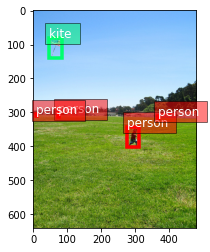

In [19]:
train_image, train_label = train_dataset[38592]
bounding_boxes = train_label[:, :4] / [train_image.shape[1],train_image.shape[0],train_image.shape[1],train_image.shape[0]]
class_ids = train_label[:, 4]
print(train_label.shape)
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
      bounding_boxes)
print('Class IDs (num_boxes, ):\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes * [train_image.shape[1],train_image.shape[0],train_image.shape[1],train_image.shape[0]], scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.show()

In [20]:
COLORS = np.random.randint(0, 255, size=(80, 3),dtype="uint8")
def show_img_bbox(img,targets):
    if torch.is_tensor(img):
        img=to_pil_image(img)
    if torch.is_tensor(targets):
        targets=targets.numpy()
        
    W, H=img.shape[1] , img.shape[0]
    rimg = img#.asnumpy()
    i = 1
    for tg in targets:
        print('the bbox',tg[:-1])
        id_=int(tg[-1])
        bbox=tg[:-1]
        #print('the lenth of bbox', len(bbox))
        xc,yc,w,h=bbox
        #print('one of the dimentions ',xc)
        color = [int(c) for c in COLORS[id_]]
        #print(type(color))
        #print((color))
        name=train_dataset.classes[id_]

        #print('detecting object ' + str(i) + ' is done')

        
        cv2.rectangle(rimg,(int(xc), int(yc)), (int(w), int(h)),color,1)
        
        cv2.putText(rimg, name, (int(xc), int(yc)), cv2.FONT_HERSHEY_SIMPLEX, 1 , color, 2, cv2.LINE_AA)
        
        i += 1

    plt.imshow(rimg)

In [21]:
def n_pos(labels,shape):
  y,x,_ = shape
  labels[:,:4] = labels[:,:4] / np.array([x,y,x,y])
  return labels

In [22]:
def rescale_bbox(bb,W,H):
    k = np.array([W,H,W,H])
    bb[:,:4] = bb[:,:4] * k
    return bb

In [74]:
def mid(bb):
  w = bb[:,2] - bb[:,0]
  l = bb[:,3] - bb[:,1]
  bb[:,0] = (bb[:,0] + bb[:,2]) // 2
  bb[:,1] = (bb[:,1] + bb[:,3]) // 2
  bb[:,2] = w
  bb[:,3] = l
  return bb

In [72]:
def points(bb):
  w2 = bb[:,2] // 2
  l2 = bb[:,3] // 2
  bb[:,2] = bb[:,0] + w2
  bb[:,3] = bb[:,1] + l2
  bb[:,0] =  bb[:,0] - w2
  bb[:,1] = bb[:,1] - l2
  return bb

819840 (6, 5)
the bbox [115.   288.   228.33 391.46]
the bbox [329.   283.   433.68 373.92]
the bbox [362.   334.   402.13 374.74]
the bbox [565.   275.   639.   374.68]
the bbox [491.   301.   512.95 371.4 ]
the bbox [492.   310.   566.06 371.09]


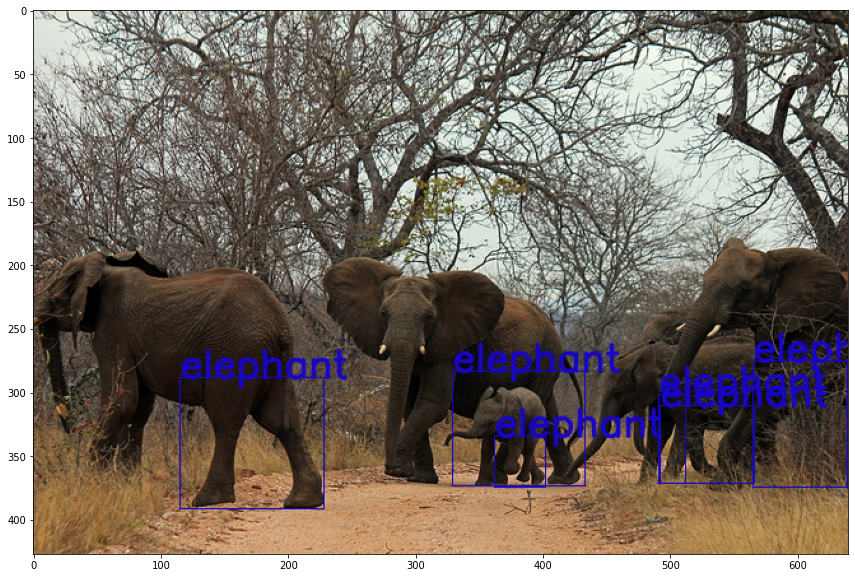

In [24]:

#rnd_ind=np.random.randint(len(train_dataset))
img, labels = train_dataset[50]
labels = mid(labels) 
print(img.size, labels.shape)

plt.rcParams['figure.figsize'] = (20, 10)
show_img_bbox(img.asnumpy(),labels)


# Transforming the Data

In [25]:
def pad_to_square(img, boxes, pad_value=0, normalized_labels=True):
    h, w , _ = img.shape
    w_factor, h_factor = (w,h) if normalized_labels else (1, 1)
    
    dim_diff = np.abs(h - w)
    pad1= dim_diff // 2
    pad2= dim_diff - pad1
    k = None
    if h<=w:
        k = 1
        left, top, right, bottom= 0, pad1, 0, pad2
    else:
        k = 2
        left, top, right, bottom= pad1, 0, pad2, 0
    padding= (left, top, right, bottom)

    img_padded = TF.pad(Image.fromarray(img), padding=padding, fill=pad_value)
    w_padded, h_padded = img_padded.size
            
    if k == 1 :
      pad = (h_padded - h)//2
      boxes[:,:4] = n_pos(rescale_bbox(boxes,w,h)[:,:4] + np.array([0,pad,0,pad]),(h_padded,w_padded,3))
    else:
      pad = (w_padded - w)//2
      boxes[:,:4] = n_pos(rescale_bbox(boxes,w,h)[:,:4] + np.array([pad,0,pad,0]),(h_padded,w_padded,3))


    return img_padded, boxes


In [26]:
img,labels = train_dataset[50]
print(img.shape)
labels = n_pos(labels, img.shape)
img_padded, boxes = pad_to_square(img.asnumpy(), labels, pad_value=0, normalized_labels=True)
print(img_padded.size)
#print(labels)
#print(labels[:,:4]+np.array([5,5,5,5]))

(427, 640, 3)
(640, 640)


the bbox [  2.88 291.19 228.33 497.46]
the bbox [225.83 299.98 433.68 479.92]
the bbox [322.22 400.57 402.13 480.74]
the bbox [491.41 282.27 639.   480.68]
the bbox [469.94 336.67 512.95 477.4 ]
the bbox [419.34 355.44 566.06 477.09]
[[  2.88 291.19 228.33 497.46  20.  ]
 [225.83 299.98 433.68 479.92  20.  ]
 [322.22 400.57 402.13 480.74  20.  ]
 [491.41 282.27 639.   480.68  20.  ]
 [469.94 336.67 512.95 477.4   20.  ]
 [419.34 355.44 566.06 477.09  20.  ]]
(640, 640)


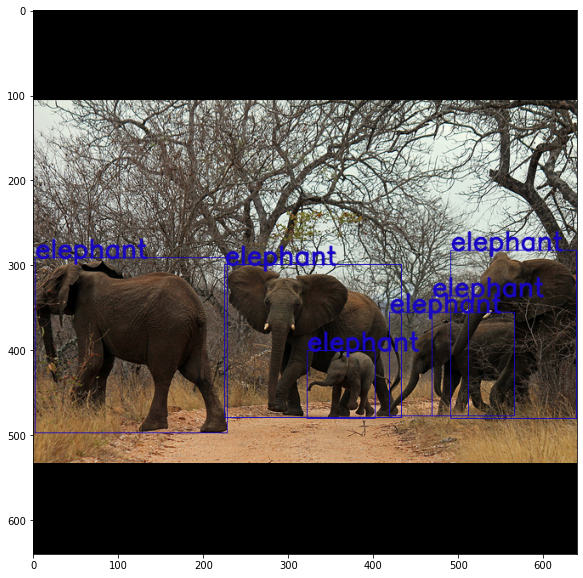

In [27]:
img,labels = train_dataset[50]
labels = n_pos(labels,img.shape)
img_padded, boxes = pad_to_square(img.asnumpy(), labels, pad_value=0, normalized_labels=True)
rescaled_boxes = rescale_bbox(boxes,img_padded.size[0],img_padded.size[1]) 
show_img_bbox(np.array(img_padded),rescaled_boxes)
print(rescaled_boxes)
print(img_padded.size)

In [28]:
def hflip(image, labels):
    image = cv2.flip(image, 1)
    labels[:, 0] = 1.0 - labels[:, 0]
    labels[:, 2] = 1.0 - labels[:, 2]
    return image, labels

In [68]:
cd /content

/content


[[9.24791667e-01 8.65312500e-01 8.64604167e-01 9.98437500e-01
  3.90000000e+01]
 [3.49041667e-01 3.92062500e-01 2.79166667e-03 8.53031250e-01
  5.70000000e+01]
 [9.99312500e-01 4.34671875e-01 7.03229167e-01 8.40031250e-01
  5.70000000e+01]
 [7.23541667e-01 1.02656250e-02 3.08062500e-01 9.87093750e-01
  0.00000000e+00]
 [9.97000000e-01 4.11796875e-01 5.70625000e-01 9.54062500e-01
  0.00000000e+00]
 [3.83937500e-01 4.11031250e-01 1.62791667e-01 8.11265625e-01
  0.00000000e+00]
 [7.83916667e-01 9.30140625e-01 6.80333333e-01 9.98437500e-01
  4.10000000e+01]
 [9.99833333e-01 9.32015625e-01 9.11625000e-01 9.98437500e-01
  4.10000000e+01]
 [7.56041667e-01 5.02656250e-01 6.66208333e-01 5.35718750e-01
  6.50000000e+01]
 [2.83458333e-01 7.33812500e-01 1.49479167e-01 8.47046875e-01
  2.60000000e+01]
 [1.00000000e+00 5.82406250e-01 9.08020833e-01 8.98625000e-01
  0.00000000e+00]
 [1.76020833e-01 5.28093750e-01 2.08333333e-03 8.86078125e-01
  0.00000000e+00]
 [8.10729167e-01 1.11109375e-01 5.839791

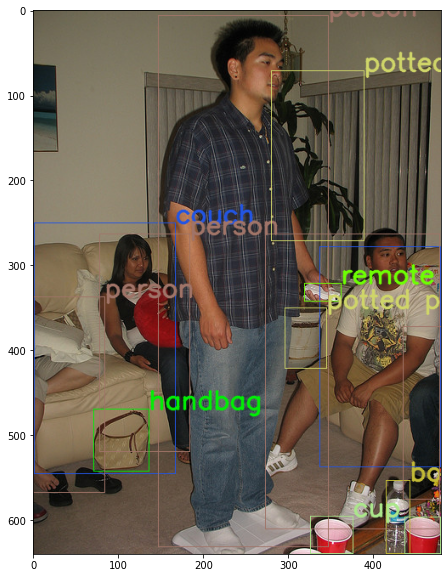

In [69]:
img,labels = train_dataset[40]
labels = n_pos(labels,img.shape)

img,labels = hflip(img.asnumpy(), labels)
print(labels)
labels = rescale_bbox(labels,img.shape[1],img.shape[0])
show_img_bbox(img,labels)


the bbox [283.153  132.6975  24.6675 346.45  ]
the bbox [414.804  99.45  221.611 342.303]


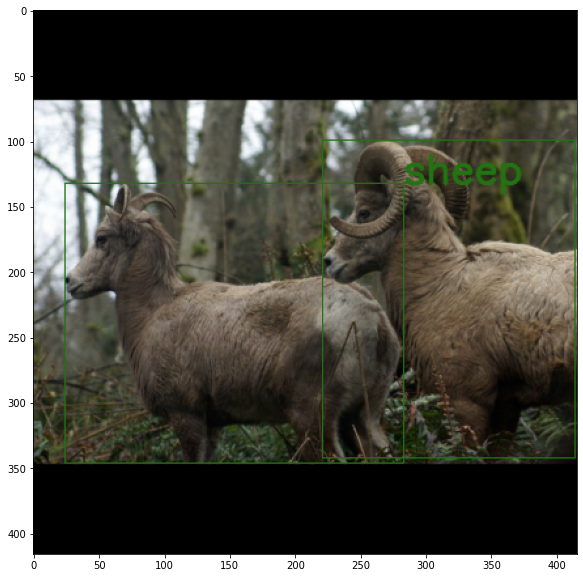

In [30]:
img, labels = train_dataset[89256]
labels = n_pos(labels,img.shape)
img,labels= pad_to_square(img.asnumpy(), labels)
img,labels=hflip(np.array(img),labels)
img = TF.resize(Image.fromarray(img),(416,416))
img = np.array(img)
labels = rescale_bbox(labels,img.shape[1],img.shape[0])
show_img_bbox(img,labels)

In [31]:
def transformer(image, labels, params):
    labels = n_pos(mid(labels),image.shape)
    if params["pad2square"] is True:
        image,labels= pad_to_square(image.asnumpy(), labels)
    
    image = TF.resize(image,params["target_size"])

    if random.random() < params["p_hflip"]:
        image,labels=hflip(np.array(image),labels)

    image=TF.to_tensor(image)
    targets = torch.zeros((len(labels), 6))
    targets[:, 1:] = torch.from_numpy(labels)
    
    return image, targets

(416, 416, 3)
<class 'numpy.ndarray'>
tensor([[261.9500, 239.2000, 258.4855, 282.6525,  18.0000],
        [ 97.5000, 220.3500, 193.1930, 311.7530,  18.0000]])
the bbox [132.94998 119.      390.94998 282.6525 ]
the bbox [  1.5     110.      193.5     311.75302]


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


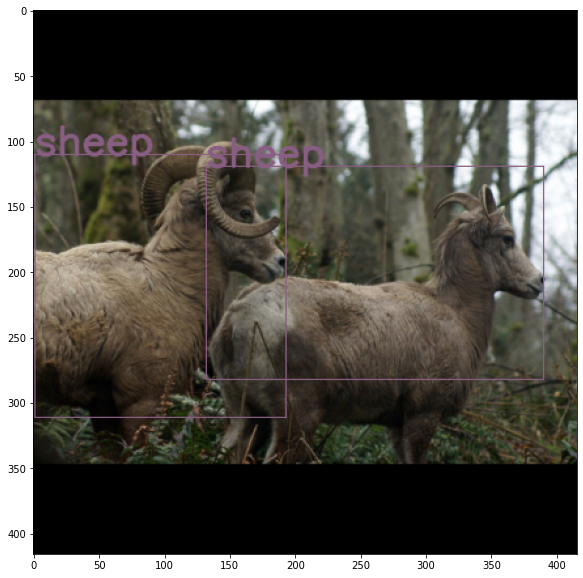

In [76]:
from torchvision import transforms
img, labels = train_dataset[89256]
trans_params_train={
    "target_size" : (416, 416),
    "pad2square": True,
    "p_hflip" : 0.0,
    "normalized_labels": True,
}
img , labels = transformer(img, labels, trans_params_train)
img = transforms.ToPILImage()(img)
img = np.array(img)
labels[:,1:] = rescale_bbox(labels[:,1:],img.shape[1],img.shape[0])
print(img.shape)
print(type(img))
print(labels[:,1:])
labels = points(labels)
show_img_bbox(img, labels[:,1:])

In [33]:
class CocoDataset(Dataset):
    def __init__(self, data, transform=None, trans_params=None):
        # get list of images
        self.data = data
        self.trans_params = trans_params
        self.transform = transform

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        img,labels = self.data[index]
        if self.transform:
            img, labels = self.transform(img, labels, self.trans_params)

        return img, labels

In [34]:

train_dataset = data.COCODetection('.',splits=['instances_train2017'])
val_dataset = data.COCODetection('.',splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))




loading annotations into memory...
Done (t=38.99s)
creating index...
index created!
loading annotations into memory...
Done (t=0.69s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


In [57]:
trans_params_train={
    "target_size" : (416, 416),
    "pad2square": True,
    "p_hflip" : 1.0,
    "normalized_labels": True,
}

coco_train = CocoDataset(train_dataset,
                        transform=transformer,
                         trans_params=trans_params_train)

40559
image shape: torch.Size([3, 416, 416])
labels shape: torch.Size([2, 6])
tensor([[  0.0000, 189.8000, 193.7000, 268.3395, 220.9610,   0.0000],
        [  0.0000, 155.3500, 295.1000, 150.9755, 144.5080,  37.0000]])
the bbox [ 55.800003  83.7      323.8      303.7     ]
the bbox [ 80.34999 223.1     230.34999 367.1    ]


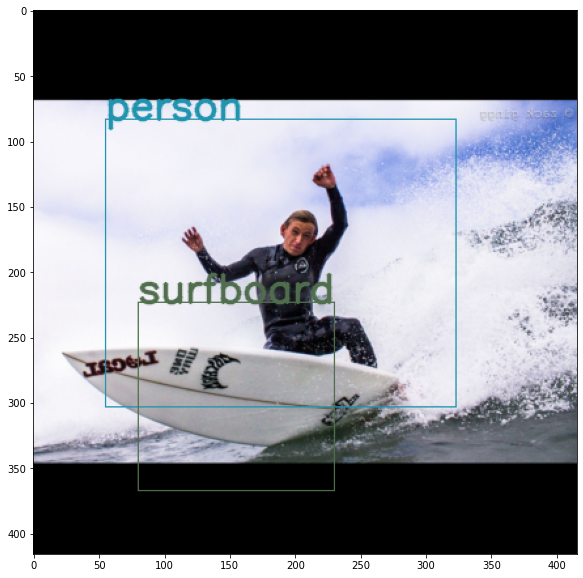

In [78]:
np.random.seed(5985)
rnd_ind=np.random.randint(len(coco_train))
print(rnd_ind)
img, targets = coco_train[rnd_ind] 
print("image shape:", img.shape)
print("labels shape:", targets.shape) 

plt.rcParams['figure.figsize'] = (20, 10)
COLORS = np.random.randint(0, 255, size=(80, 3),dtype="uint8")
img = transforms.ToPILImage()(img)
img = np.array(img)
targets[:,1:] = rescale_bbox(targets[:,1:],img.shape[1],img.shape[0])
print(targets)
targets[:,1:] = points(targets[:,1:])
show_img_bbox(img,targets[:,1:])

In [37]:
trans_params_val={
    "target_size" : (416, 416),
    "pad2square": True,
    "p_hflip" : 0.0,
    "normalized_labels": True,
}
coco_val= CocoDataset(val_dataset,
                      transform=transformer,
                      trans_params=trans_params_val)

image shape: torch.Size([3, 416, 416])
labels shape: torch.Size([2, 6])
tensor([[  0.0000, 202.1500, 277.5500, 261.5730, 334.6070,  54.0000],
        [  0.0000, 206.0500, 205.4000, 412.5550, 359.2290,  45.0000]])
the bbox [202.15001 277.55002 261.573   334.607  ]
the bbox [206.05    205.40001 412.555   359.229  ]


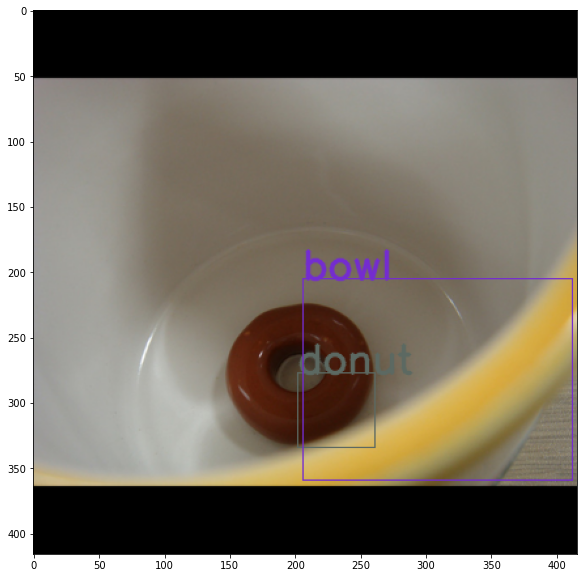

In [38]:
np.random.seed(85)
rnd_ind=np.random.randint(len(coco_val))
img, targets = coco_val[rnd_ind] 
print("image shape:", img.shape)
print("labels shape:", targets.shape) 

plt.rcParams['figure.figsize'] = (20, 10)
COLORS = np.random.randint(0, 255, size=(80, 3),dtype="uint8")
img = transforms.ToPILImage()(img)
img = np.array(img)
targets[:,1:] = rescale_bbox(targets[:,1:],img.shape[1],img.shape[0])
print(targets)

show_img_bbox(img,targets[:,1:])

## **Defining Data Loaders**

In [39]:
from torch.utils.data import DataLoader

batch_size=8

train_dl = DataLoader(
        coco_train,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        pin_memory=True
        )

In [40]:
from torch.utils.data import DataLoader

batch_size=8
def collate_fn(batch):
    
    imgs, targets = list(zip(*batch))
    
    # Remove empty boxes
    targets = [boxes for boxes in targets if boxes is not None]
    
    # set the sample index 
    
    for b_i, boxes in enumerate(targets):
        boxes[:, 0] = b_i
    targets = torch.cat(targets, 0)
    imgs = torch.stack([img for img in imgs])
    return imgs, targets

train_dl = DataLoader(
        coco_train,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        pin_memory=True,
        collate_fn=collate_fn,
        )

In [41]:
torch.manual_seed(5)
for imgs_batch,tg_batch in train_dl:
    break
print(imgs_batch.shape)
print(tg_batch.shape,tg_batch.dtype)
print(tg_batch[:,0])

torch.Size([8, 3, 416, 416])
torch.Size([41, 6]) torch.float32
tensor([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 3., 4., 4., 4., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 6., 6., 6., 7.])


## **Creating YOLO-v3 Model**

In [42]:
# import shutil

# shutil.rmtree('/content/darknet')

!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5940, done.
remote: Total 5940 (delta 0), reused 0 (delta 0), pack-reused 5940
Receiving objects: 100% (5940/5940), 6.34 MiB | 6.21 MiB/s, done.
Resolving deltas: 100% (3941/3941), done.


In [79]:
cd /content/drive/MyDrive/cv with pytorch/chapter5

/content/drive/MyDrive/cv with pytorch/chapter5


In [80]:
from myutils import parse_model_config
path2config="/content/darknet/cfg/yolov3-voc.cfg"
blocks_list = parse_model_config(path2config)
blocks_list[:2]

[{'angle': '0',
  'batch': '1',
  'burn_in': '1000',
  'channels': '3',
  'decay': '0.0005',
  'exposure': '1.5',
  'height': '416',
  'hue': '.1',
  'learning_rate': '0.001',
  'max_batches': '50200',
  'momentum': '0.9',
  'policy': 'steps',
  'saturation': '1.5',
  'scales': '.1,.1',
  'steps': '40000,45000',
  'subdivisions': '1',
  'type': 'net',
  'width': '416'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '32',
  'pad': '1',
  'size': '3',
  'stride': '1',
  'type': 'convolutional'}]

In [81]:
from myutils import create_layers

hy_pa, m_l= create_layers(blocks_list)
print(m_l)
#print(hy_pa)

ModuleList(
  (0): Sequential(
    (conv_0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (leaky_0): LeakyReLU(negative_slope=0.1)
  )
  (1): Sequential(
    (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (leaky_1): LeakyReLU(negative_slope=0.1)
  )
  (2): Sequential(
    (conv_2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (leaky_2): LeakyReLU(negative_slope=0.1)
  )
  (3): Sequential(
    (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (batch_norm_3): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (leaky_3):

In [82]:
import torch.nn as nn
class Darknet(nn.Module):
    def __init__(self, config_path, img_size=416):
        super(Darknet, self).__init__()
        self.blocks_list = parse_model_config(config_path)
        self.hyperparams, self.module_list = create_layers(self.blocks_list)
        self.img_size = img_size
        
    def forward(self, x):
        img_dim = x.shape[2]
        layer_outputs, yolo_outputs = [], []
        
        for block, module in zip(self.blocks_list[1:], self.module_list):
            if block["type"] in ["convolutional", "upsample", "maxpool"]:
                x = module(x)        
                
                
            elif block["type"] == "shortcut":
                layer_ind = int(block["from"])
                x = layer_outputs[-1] + layer_outputs[layer_ind]
            elif block["type"] == "yolo":
                x= module[0](x)
                yolo_outputs.append(x)
            elif block["type"] == "route":
                x = torch.cat([layer_outputs[int(l_i)] 
                               for l_i in block["layers"].split(",")], 1)
            layer_outputs.append(x)
        yolo_out_cat = torch.cat(yolo_outputs, 1)
        return yolo_out_cat, yolo_outputs



In [83]:
model = Darknet(path2config).to(device)
print(model)

Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (conv_0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_0): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_1): LeakyReLU(negative_slope=0.1)
    )
    (2): Sequential(
      (conv_2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_2): LeakyReLU(negative_slope=0.1)
    )
    (3): Sequential(
      (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_3): BatchNorm2d(64, eps=1e-05, momen

In [84]:
dummy_img=torch.rand(1,3,416,416).to(device)
with torch.no_grad():
    dummy_out_cat, dummy_out=model.forward(dummy_img)
    print(dummy_out_cat.shape)
    print(dummy_out[0].shape,dummy_out[1].shape,dummy_out[2].shape)

torch.Size([1, 10647, 25])
torch.Size([1, 507, 25]) torch.Size([1, 2028, 25]) torch.Size([1, 8112, 25])


## **Defining the Loss Function**

In [85]:
def get_loss_batch(output,targets, params_loss, opt=None):
    ignore_thres=params_loss["ignore_thres"]
    scaled_anchors= params_loss["scaled_anchors"]    
    mse_loss= params_loss["mse_loss"]
    bce_loss= params_loss["bce_loss"]
    
    num_yolos=params_loss["num_yolos"]
    num_anchors= params_loss["num_anchors"]
    obj_scale= params_loss["obj_scale"]
    noobj_scale= params_loss["noobj_scale"]
    
    loss=0.0
    for yolo_ind in range(num_yolos):
        yolo_out=output[yolo_ind]
        batch_size, num_bbxs, _=yolo_out.shape
        
        # get grid size
        gz_2=num_bbxs/num_anchors
        grid_size=int(np.sqrt(gz_2))
        
        yolo_out=yolo_out.view(batch_size,num_anchors,grid_size,grid_size,-1)
        
        pred_boxes=yolo_out[:,:,:,:,:4]
        x,y,w,h= transform_bbox(pred_boxes, scaled_anchors[yolo_ind])
        pred_conf=yolo_out[:,:,:,:,4]
        pred_cls_prob=yolo_out[:,:,:,:,5:]
        
        yolo_targets = get_yolo_targets({
                                            "pred_cls_prob": pred_cls_prob,
                                            "pred_boxes":pred_boxes,    
                                            "targets": targets,    
                                            "anchors": scaled_anchors[yolo_ind],    
                                            "ignore_thres": ignore_thres,
                                        }) 
        
        obj_mask=yolo_targets["obj_mask"]        
        noobj_mask=yolo_targets["noobj_mask"]            
        tx=yolo_targets["tx"]                
        ty=yolo_targets["ty"]                    
        tw=yolo_targets["tw"]                        
        th=yolo_targets["th"]                            
        tcls=yolo_targets["tcls"]                                
        t_conf=yolo_targets["t_conf"]
        
        loss_x = mse_loss(x[obj_mask], tx[obj_mask])
        loss_y = mse_loss(y[obj_mask], ty[obj_mask])
        loss_w = mse_loss(w[obj_mask], tw[obj_mask])
        loss_h = mse_loss(h[obj_mask], th[obj_mask])
        
        loss_conf_obj = bce_loss(pred_conf[obj_mask], t_conf[obj_mask])
        loss_conf_noobj = bce_loss(pred_conf[noobj_mask], t_conf[noobj_mask])
        loss_conf = obj_scale * loss_conf_obj + noobj_scale * loss_conf_noobj
        loss_cls = bce_loss(pred_cls_prob[obj_mask], tcls[obj_mask])
        loss += loss_x + loss_y + loss_w + loss_h + loss_conf + loss_cls
        
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
        
    return loss.item()

In [86]:
def transform_bbox(bbox, anchors):
    x=bbox[:,:,:,:,0]
    y=bbox[:,:,:,:,1]
    w=bbox[:,:,:,:,2]
    h=bbox[:,:,:,:,3]
    anchor_w = anchors[:, 0].view((1, 3, 1, 1))
    anchor_h = anchors[:, 1].view((1, 3, 1, 1))       
    
    x=x-x.floor()
    y=y-y.floor()
    w= torch.log(w / anchor_w + 1e-16)
    h= torch.log(h / anchor_h + 1e-16)
    return x, y, w, h

In [87]:
def get_yolo_targets(params):
    pred_boxes=params["pred_boxes"]
    pred_cls_prob=params["pred_cls_prob"]
    target=params["targets"]
    anchors=params["anchors"] 
    ignore_thres=params["ignore_thres"] 

    batch_size = pred_boxes.size(0)
    num_anchors = pred_boxes.size(1)
    grid_size = pred_boxes.size(2)
    num_cls = pred_cls_prob.size(-1)
    
    
    sizeT=batch_size, num_anchors, grid_size, grid_size
    obj_mask = torch.zeros(sizeT,device=device,dtype=torch.uint8)
    noobj_mask = torch.ones(sizeT,device=device,dtype=torch.uint8)
    tx = torch.zeros(sizeT, device=device, dtype=torch.float32)
    ty= torch.zeros(sizeT, device=device, dtype=torch.float32)
    tw= torch.zeros(sizeT, device=device, dtype=torch.float32)
    th= torch.zeros(sizeT, device=device, dtype=torch.float32)
    
    sizeT=batch_size, num_anchors, grid_size, grid_size, num_cls
    tcls= torch.zeros(sizeT, device=device, dtype=torch.float32)
    
    target_bboxes = target[:, 2:] * grid_size
    t_xy = target_bboxes[:, :2]
    t_wh = target_bboxes[:, 2:]
    t_x, t_y = t_xy.t()
    t_w, t_h = t_wh.t()

    grid_i, grid_j = t_xy.long().t()
    
    iou_with_anchors=[get_iou_WH(anchor, t_wh) for anchor in anchors]
    iou_with_anchors = torch.stack(iou_with_anchors)
    best_iou_wa, best_anchor_ind = iou_with_anchors.max(0)
    
    batch_inds, target_labels = target[:, :2].long().t()
    obj_mask[batch_inds, best_anchor_ind, grid_j, grid_i] = 1
    noobj_mask[batch_inds, best_anchor_ind, grid_j, grid_i] = 0

    for ind, iou_wa in enumerate(iou_with_anchors.t()):
        noobj_mask[batch_inds[ind], iou_wa > ignore_thres, grid_j[ind], grid_i[ind]] = 0
        
        
    tx[batch_inds, best_anchor_ind, grid_j, grid_i] = t_x - t_x.floor()
    ty[batch_inds, best_anchor_ind, grid_j, grid_i] = t_y - t_y.floor()
    

    anchor_w=anchors[best_anchor_ind][:, 0]
    tw[batch_inds, best_anchor_ind, grid_j, grid_i] = torch.log(t_w / anchor_w + 1e-16)
    
    anchor_h=anchors[best_anchor_ind][:, 1]
    th[batch_inds, best_anchor_ind, grid_j, grid_i] = torch.log(t_h / anchor_h + 1e-16)
    
    tcls[batch_inds, best_anchor_ind, grid_j, grid_i, target_labels] = 1
    
    output={
        "obj_mask" : obj_mask,
        "noobj_mask" : noobj_mask,
        "tx": tx,
        "ty": ty,
        "tw": tw,
        "th": th,
        "tcls": tcls,
        "t_conf": obj_mask.float(),
    }
    return output

In [88]:
def get_iou_WH(wh1, wh2):
    wh2 = wh2.t()
    w1, h1 = wh1[0], wh1[1]
    w2, h2 = wh2[0], wh2[1]
    inter_area = torch.min(w1, w2) * torch.min(h1, h2)
    union_area = (w1 * h1 + 1e-16) + w2 * h2 - inter_area
    return inter_area / union_area